## Samples collection from Archiver

In [1]:
import pandas as pd
import os
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  # 
import joblib
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import yaml


In [2]:
file_dir = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/dataset/'
pickle_files = ['hxr_archiver_Jan_updated.pkl', 'hxr_archiver_Feb_updated.pkl'] 
pickle_files = ['hxr_archiver_Jan_updated.pkl', 'hxr_archiver_Feb_updated.pkl', 'hxr_archiver_March_updated.pkl',
               'hxr_archiver_Sep_updated.pkl', 'hxr_archiver_Oct_updated.pkl', 'hxr_archiver_Nov_updated.pkl'] 
            # 'hxr_archiver_Jan_updated.pkl', 'hxr_archiver_Feb_updated.pkl']
# pickle_files = ['hxr_archiver_MD_updated.pkl']
dfs = [pd.read_pickle(file_dir+file).reset_index(drop=True) for file in pickle_files]

all_df = pd.concat(dfs, axis=0, ignore_index=True)

print('Number of total samples:', all_df.shape[0])
# all_df.describe()

Number of total samples: 5678739


## Samples filtering

In [3]:
def dataset_filter(dataset):
    # Filtering based on multiple conditions
    condition = (dataset['hxr_pulse_intensity'] > 0.02) & (dataset['hxr_pulse_intensity'] < 3) & \
                (dataset['Bunch length at BC1'] > 200) & (dataset['Bunch length at BC1'] < 300) & \
                (dataset['Bunch length at BC2'] > 3e3) & (dataset['Bunch length at BC2'] < 1e5) & \
                (dataset['Charge at gun [pC]'] > 240) & (dataset['Charge at gun [pC]'] < 260) & \
                (dataset['Charge after BC1 [pC]'] < 200) & \
                (dataset['HXR electron energy [GeV]'] > 10) & (dataset['HXR photon energy [eV]'] > 900)
                # all_df['hxr_pulse_intensity'] > 0.05)
    return dataset[condition]


In [4]:
final_df = dataset_filter(all_df)
print('Number of samples after filtering:', final_df.shape[0])

# Specify the fraction of the dataset to select


print('Number of final samples:', final_df.shape[0])
print('Features in samples:',final_df.keys())

Number of samples after filtering: 2576536
Number of final samples: 2576536
Features in samples: Index(['QUAD:IN20:121:BACT', 'QUAD:IN20:122:BACT', 'QUAD:IN20:361:BACT',
       'QUAD:IN20:371:BACT', 'QUAD:IN20:425:BACT', 'QUAD:IN20:441:BACT',
       'QUAD:IN20:511:BACT', 'QUAD:IN20:525:BACT', 'QUAD:LI21:201:BACT',
       'QUAD:LI21:211:BACT', 'QUAD:LI21:221:BACT', 'QUAD:LI21:251:BACT',
       'QUAD:LI21:271:BACT', 'QUAD:LI21:278:BACT', 'QUAD:LI24:740:BACT',
       'QUAD:LI24:860:BACT', 'QUAD:LI26:201:BACT', 'QUAD:LI26:301:BACT',
       'QUAD:LI26:401:BACT', 'QUAD:LI26:501:BACT', 'QUAD:LI26:601:BACT',
       'QUAD:LI26:701:BACT', 'QUAD:LI26:801:BACT', 'QUAD:LI26:901:BACT',
       'QUAD:LTUH:440:BACT', 'QUAD:LTUH:460:BACT', 'QUAD:LTUH:620:BACT',
       'QUAD:LTUH:640:BACT', 'QUAD:LTUH:660:BACT', 'QUAD:LTUH:680:BACT',
       'QUAD:LTUS:640:BACT', 'QUAD:LTUS:660:BACT', 'QUAD:LTUS:680:BACT',
       'hxr_pulse_intensity', 'Bunch length at BC1', 'Bunch length at BC2',
       'Charge at gun [p

In [13]:
# if define certain specific index range in dataset and use them as testing set

start_index = 300000
end_index = 500000
final_df.iloc[start_index:end_index+1].to_pickle('./test.pkl')
# Drop rows within the specified index range
final_df.drop(final_df.index[start_index:end_index+1], inplace=True)
print('Number of final samples:', final_df.shape[0])

Number of final samples: 1043753


In [5]:
final_df = final_df.sample(frac=0.2, random_state=11)
print('Number of final samples after random selection:', final_df.shape[0])

Number of final samples after random selection: 515307


## Distribution analysis for sample set



In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [7]:
quads_inj_bctrl = ['QUAD:IN20:121:BCTRL', 'QUAD:IN20:122:BCTRL', 'QUAD:IN20:361:BCTRL', 'QUAD:IN20:371:BCTRL', 
             'QUAD:IN20:425:BCTRL', 'QUAD:IN20:441:BCTRL', 'QUAD:IN20:511:BCTRL', 'QUAD:IN20:525:BCTRL']
quads_linac_bctrl = ['QUAD:LI21:201:BCTRL', 'QUAD:LI21:211:BCTRL', 'QUAD:LI21:221:BCTRL', 'QUAD:LI21:251:BCTRL', 
               'QUAD:LI21:271:BCTRL', 'QUAD:LI21:278:BCTRL', 'QUAD:LI24:740:BCTRL', 'QUAD:LI24:860:BCTRL', 
               'QUAD:LI26:201:BCTRL', 'QUAD:LI26:301:BCTRL', 'QUAD:LI26:401:BCTRL', 'QUAD:LI26:501:BCTRL', 
               'QUAD:LI26:601:BCTRL', 'QUAD:LI26:701:BCTRL', 'QUAD:LI26:801:BCTRL', 'QUAD:LI26:901:BCTRL']
quads_ltuh_bctrl = ['QUAD:LTUH:440:BCTRL', 'QUAD:LTUH:460:BCTRL', 'QUAD:LTUH:620:BCTRL', 'QUAD:LTUH:640:BCTRL', 
              'QUAD:LTUH:660:BCTRL', 'QUAD:LTUH:680:BCTRL']
quads_ltus_bctrl = ['QUAD:LTUS:BCTRL', 'QUAD:LTUS:640:BCTRL', 'QUAD:LTUS:660:BCTRL', 'QUAD:LTUS:680:BCTRL']
quads_all_bctrl = quads_inj_bctrl + quads_linac_bctrl + quads_ltuh_bctrl + quads_ltus_bctrl
# get the BACT PV lists for quads
quads_inj_bact = [quad.replace("BCTRL", "BACT") for quad in quads_inj_bctrl] 
quads_linac_bact = [quad.replace("BCTRL", "BACT") for quad in quads_linac_bctrl] 
quads_ltuh_bact = [quad.replace("BCTRL", "BACT") for quad in quads_ltuh_bctrl] 
quads_ltus_bact = [quad.replace("BCTRL", "BACT") for quad in quads_ltus_bctrl] 

blen = ['BLEN:LI21:265:AIMAX1H', 'BLEN:LI24:886:BIMAX1H']
bcharge_gun = ['SIOC:SYS0:ML00:CALC038']
bcharge_bc1 = ['SIOC:SYS0:ML00:CALC252']
bcharge = bcharge_gun + bcharge_bc1 # at gun, after BC1 # ['BPMS:IN20:221:TMIT1H', 'BPMS:LI21:233:TMIT1H', 'BPMS:LI24:801:TMIT1H'] # at gun, BC1, BC2 
hxr_beam_energy = ['BEND:DMPH:400:BACT']
hxr_photon_energy = ['SIOC:SYS0:ML00:AO627']
hxr_energy = hxr_beam_energy + hxr_photon_energy # beam energy, photon energy
sxr_energy = ['BEND:DMPS:400:BDES','SIOC:SYS0:ML00:AO628']
laser_iris_status = ['IRIS:LR20:130:CONFG_SEL'] # the number of states represents the iris size: 1 [1.8mm], 2 [1.6mm], 3 [1.4mm], 4 [1.2mm], 5 [1.1mm], 6 [1.0mm], 7 [0.8mm]

status_name = ['Bunch length at BC1', 'Bunch length at BC2', 'Charge at gun [pC]', 'Charge after BC1 [pC]', 
               'HXR electron energy [GeV]', 'laser_iris_status']
status_from_archive = blen + bcharge + hxr_energy + laser_iris_status
beam_status = ['Charge at gun [pC]', 'Charge after BC1 [pC]', 'HXR electron energy [GeV]', 'HXR photon energy [eV]',
               'Bunch length at BC1', 'Bunch length at BC2']
# final_columns = ['timestamp'] + quads_inj + quads_linac + quads_ltuh + ['hxr_pulse_intensity'] + status_name

In [8]:
# final_df = all_df # if no filtering

input_cols = quads_inj_bact + quads_linac_bact + quads_ltuh_bact #+ beam_status
# input_cols = quads_inj_bctrl + quads_linac_bctrl + quads_ltuh_bctrl + beam_status
output_cols = ['hxr_pulse_intensity']
input_size =len(input_cols)
output_size = len(output_cols)

# final_df[input_cols].describe()

In [9]:

# Initialize dictionary for YAML
yaml_dict = {
    'input_variables': {},
    'output_variables': {}
}

# Populate the dictionary for input variables
for col in input_cols:
    lower_bound, default_value, upper_bound = final_df[col].quantile([0.25, 0.5, 0.75])
    # lower_bound, default_value, upper_bound = final_df[col].values.min(), final_df[column].values.mean(), final_df[column].values.max()
    
    yaml_dict['input_variables'][col] = {
        'variable_type': 'scalar',
        'default': default_value,
        'is_constant': False,
        'value_range': [lower_bound, upper_bound]
    }

# Populate the dictionary for output variables
for col in output_cols:
    yaml_dict['output_variables'][col] = {
    "variable_type": "scalar"
}

# Save the dictionary to a YAML file
# file_path = './feature_config.yaml'
# with open(file_path, 'w') as file:
#     yaml.dump(yaml_dict, file, sort_keys=False)


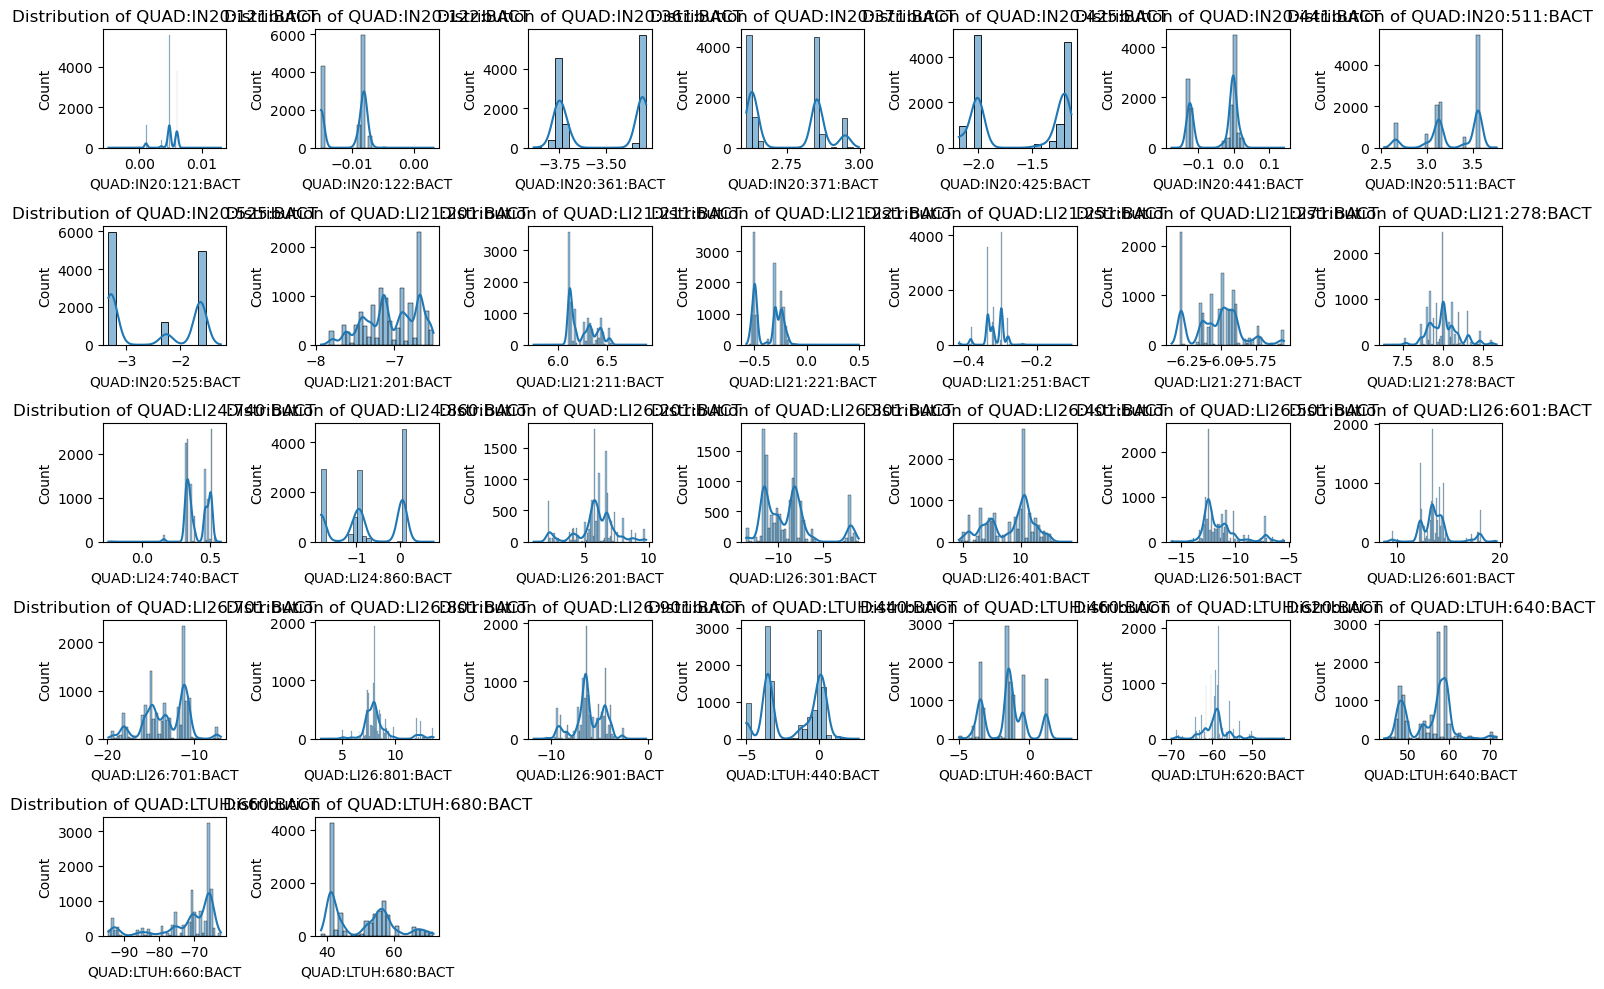

In [9]:
all_cols = input_cols #+ output_cols
plt.figure(figsize=(15, 10))
for feature in all_cols:
    plt.subplot(5, 7, all_cols.index(feature) + 1)  # Adjust the subplot layout based on number of features
    sns.histplot(final_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Select a subset of features for diversity analysis
selected_features = input_cols # + output_cols

# Pair plot for selected features
sns.pairplot(final_df[selected_features])
plt.suptitle("Pair Plot of Input Features", y=1.02)
plt.show()

## Build NN model with Pytorch

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from botorch.utils import standardize
from botorch.models.transforms.input import AffineInputTransform, Normalize
import time

In [11]:
# Create a Dataset class for PyTorch
class MyDataset(Dataset):
    def __init__(self, dataframe, input_cols, output_cols):
        self.features = dataframe[input_cols].values
        self.outputs = dataframe[output_cols].values

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx], dtype=torch.float32)
        y = torch.tensor(self.outputs[idx], dtype=torch.float32)
        return x, y


In [12]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(final_df, test_size=0.2, random_state=39)

# Standardization with sklearn
# input_scaler = StandardScaler()
# train_df[input_cols] = input_scaler.fit_transform(train_df[input_cols])
# test_df[input_cols] = input_scaler.transform(test_df[input_cols])
# output_scaler = StandardScaler()
# train_df[output_cols] = output_scaler.fit_transform(train_df[output_cols])
# test_df[output_cols] = output_scaler.transform(test_df[output_cols])

# Standardization with botorch.models.transforms.input.AffineInputTransform
# input_means = final_df[input_cols].mean()
# input_stds = final_df[input_cols].std()
# output_means = final_df[output_cols].mean()
# output_stds = final_df[output_cols].std()
input_mins = final_df[input_cols].min()
input_maxs = final_df[input_cols].max()
output_mins = final_df[output_cols].min()
output_maxs = final_df[output_cols].max()
# Convert means and stds to PyTorch tensors
input_scaler = AffineInputTransform(d=input_size,coefficient=torch.tensor(input_maxs.values-input_mins.values, dtype=torch.float32),
                                                     offset=torch.tensor(input_mins.values, dtype=torch.float32))
output_scaler = AffineInputTransform(d=output_size,coefficient=torch.tensor(output_maxs.values-output_mins.values, dtype=torch.float32),
                                                     offset=torch.tensor(output_mins.values, dtype=torch.float32))

train_df[input_cols] = input_scaler.transform(torch.tensor(train_df[input_cols].values, dtype=torch.float32))
test_df[input_cols] = input_scaler.transform(torch.tensor(test_df[input_cols].values, dtype=torch.float32))
train_df[output_cols] = output_scaler.transform(torch.tensor(train_df[output_cols].values, dtype=torch.float32))
test_df[output_cols] = output_scaler.transform(torch.tensor(test_df[output_cols].values, dtype=torch.float32))

# Create DataLoader instances for training and testing
train_dataset = MyDataset(train_df, input_cols, output_cols)
test_dataset = MyDataset(test_df, input_cols, output_cols)

batch_size = 2048

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


### Create model 

In [13]:
def create_model(version: int = 0):
    if version == 0:
        model = nn.Sequential(
            nn.Linear(input_size, 100),
            nn.ELU(),
            nn.Linear(100, 200),
            nn.ELU(),
            nn.Dropout(p=0.05),
            nn.Linear(200, 200),
            nn.ELU(),
            nn.Dropout(p=0.05),
            nn.Linear(200, 100),
            nn.ELU(),
            nn.Dropout(p=0.05),
            nn.Linear(100, 32),
            nn.ELU(),
            nn.Linear(32, 1)
        )
    elif version == 1:
        model = nn.Sequential(
                nn.Linear(input_size, 256),
                nn.Sigmoid(),
                nn.Linear(256, 128),
                nn.Sigmoid(),
                nn.Linear(128, 128),
                nn.Sigmoid(),
                nn.Linear(128, 64),
                nn.Sigmoid(),
                nn.Linear(64, 64),
                nn.Sigmoid(),
                nn.Linear(64, 32),
                nn.Sigmoid(),
                nn.Linear(32, 32),
                nn.Sigmoid(),
                nn.Linear(32, 16),
                nn.Sigmoid(),
                nn.Linear(16, output_size)
        )
    elif version == 2:
        model = nn.Sequential(
                nn.Linear(input_size, 32),
                nn.ReLU(),
                nn.Linear(32, 64),
                nn.ReLU(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 64),
                nn.ReLU(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Dropout(p=0.05),
                nn.Linear(32, 32),
                nn.ReLU(),
                nn.Linear(32, output_size)
            )
    elif version == 3:
        model = nn.Sequential(
                nn.Linear(input_size, 32),
                nn.Sigmoid(),
                nn.Linear(32, 64),
                nn.Sigmoid(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 64),
                nn.Sigmoid(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 32),
                nn.Sigmoid(),
                nn.Dropout(p=0.05),
                nn.Linear(32, 32),
                nn.Sigmoid(),
                nn.Linear(32, output_size)
            )
    elif version == 4:
        model = nn.Sequential(
                nn.Linear(input_size, 512),
                nn.ELU(),
                nn.Linear(512, 256),
                nn.ELU(),
                nn.Linear(256, 128),
                nn.ELU(),
                nn.Linear(128, 64),
                nn.ELU(),
                nn.Linear(64, 64),
                nn.ELU(),
                nn.Linear(64, 32),
                nn.ELU(),
                nn.Linear(32, 32),
                nn.ELU(),
                nn.Linear(32, 16),
                nn.ELU(),
                nn.Linear(16, output_size)
            )
    elif version == 5:
        model = nn.Sequential(
                nn.Linear(input_size, 128),
                nn.ELU(),
                nn.Dropout(p=0.05),
                nn.Linear(128, 64),
                nn.ELU(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 64),
                nn.ELU(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 32),
                nn.ELU(),
                nn.Dropout(p=0.05),
                nn.Linear(32, 16),
                nn.ELU(),
                nn.Linear(16, output_size)
            )
    else:
        raise ValueError(f"Unknown model version {version}.")
    return model.float()

In [16]:

# Modify the create_model function to return a list of models
def create_ensemble_models(num_models, model_version=0):
    models = [create_model(model_version) for _ in range(num_models)]
    return models

# Train each model in the ensemble
def train_model(model, train_loader, criterion, optimizer, n_epochs=100):
    model.train()  # Set the model to training mode
    total_start_time = time.time()
    for epoch in range(n_epochs):
        epoch_start_time = time.time()  # Start time of the epoch
        running_loss = 0.0  # Accumulate losses over the epoch
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize
            
            running_loss += loss.item() * inputs.size(0)  # Update total loss
        
        epoch_loss = running_loss / len(train_loader.dataset)  # Calculate average loss over the epoch
        epoch_end_time = time.time()  # End time of the epoch
        epoch_duration = epoch_end_time - epoch_start_time  # Calculate duration of the epoch
        
        # Print training log
        if epoch % 5 == 0:
            print(f"Epoch {epoch+1}/{n_epochs} - Loss: {epoch_loss:.4f} - Time: {epoch_duration:.2f} sec")
    
    total_end_time = time.time()  # End time of the entire training
    total_duration = total_end_time - total_start_time  # Calculate total training time
    
    # Print total training time
    print(f"Total training time: {total_duration:.2f} sec")

def bootstrap_dataset(dataset, subset_size):
    """
    Creates a bootstrapped subset of the dataset.
    
    Parameters:
        dataset (Dataset): The original dataset.
        
    Returns:
        Subset: A bootstrapped subset of the original dataset.
    """
    # Generate random indices with replacement
    indices = torch.randint(0, len(dataset), (subset_size,))
    subset = Subset(dataset, indices)
    return subset

def bootstrap_loaders(dataset, num_models, batch_size):
    """
    Creates DataLoaders for each model in the ensemble, each with a bootstrapped subset of the dataset.
    
    Parameters:
        dataset (Dataset): The original dataset to bootstrap from.
        num_models (int): The number of models in the ensemble.
        batch_size (int): The batch size for each DataLoader.
        
    Returns:
        list: A list of DataLoader instances, each corresponding to a bootstrapped subset of the dataset.
    """
    loaders = []
    for _ in range(num_models):
        subset = bootstrap_dataset(dataset, subset_size=subset_size)
        loader = DataLoader(subset, batch_size=batch_size, shuffle=True)
        loaders.append(loader)
    return loaders




In [15]:
# Example: Create an ensemble of 5 models
num_models = 30
subset_size = 200000
ensemble_models = create_ensemble_models(num_models, model_version=5)
# ensemble_models = [create_model(version=i % 6) for i in range(num_models)]  
ensemble_datasets = [bootstrap_dataset(train_dataset, subset_size=subset_size) for _ in range(num_models)]
ensemble_loaders = [DataLoader(ds, batch_size=batch_size, shuffle=True) for ds in ensemble_datasets]

# ensemble_loaders = bootstrap_loaders(train_dataset, num_models, batch_size)



In [16]:
# Train each model with its respective DataLoader
for model, loader in zip(ensemble_models, ensemble_loaders):
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    criterion =nn.L1Loss()# nn.MSELoss()
    train_model(model, loader, criterion, optimizer, n_epochs=30)


Epoch 1/30 - Loss: 0.2312 - Time: 8.99 sec
Epoch 6/30 - Loss: 0.1016 - Time: 9.20 sec
Epoch 11/30 - Loss: 0.0957 - Time: 7.13 sec
Epoch 16/30 - Loss: 0.0933 - Time: 10.05 sec
Epoch 21/30 - Loss: 0.0911 - Time: 10.16 sec
Epoch 26/30 - Loss: 0.0889 - Time: 9.53 sec
Total training time: 279.71 sec
Epoch 1/30 - Loss: 0.2394 - Time: 8.95 sec
Epoch 6/30 - Loss: 0.1049 - Time: 9.02 sec
Epoch 11/30 - Loss: 0.0986 - Time: 11.24 sec
Epoch 16/30 - Loss: 0.0955 - Time: 8.05 sec
Epoch 21/30 - Loss: 0.0938 - Time: 9.10 sec
Epoch 26/30 - Loss: 0.0925 - Time: 9.54 sec
Total training time: 281.75 sec
Epoch 1/30 - Loss: 0.3198 - Time: 9.34 sec
Epoch 6/30 - Loss: 0.1053 - Time: 7.22 sec
Epoch 11/30 - Loss: 0.0990 - Time: 8.20 sec
Epoch 16/30 - Loss: 0.0961 - Time: 8.45 sec
Epoch 21/30 - Loss: 0.0940 - Time: 8.04 sec
Epoch 26/30 - Loss: 0.0925 - Time: 9.42 sec
Total training time: 252.05 sec
Epoch 1/30 - Loss: 0.2526 - Time: 7.24 sec
Epoch 6/30 - Loss: 0.1031 - Time: 8.46 sec
Epoch 11/30 - Loss: 0.0966 - 

In [23]:
def ensemble_predict(models, data_loader):
    all_predictions = []
    with torch.no_grad():
        for inputs, _ in data_loader:
            # Stack predictions from all models
            predictions = torch.stack([model(inputs) for model in models])
            all_predictions.append(predictions)
    all_predictions = torch.cat(all_predictions, dim=1)  # Shape: [num_models, num_samples, num_outputs]
    
    # Calculate mean and standard deviation across models for each sample
    mean_predictions = torch.mean(all_predictions, dim=0)
    std_predictions = torch.std(all_predictions, dim=0)
    
    return mean_predictions, std_predictions


In [18]:
##loading ensemble model if needed
model_path = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/model/'  
ensemble_name = '2024-03-18_21-34-07_ensemble/'
ensemble_models, input_scaler, output_scaler, input_cols, output_cols = load_ensemble_models(model_path, ensemble_name)
# new_mean_predictions_loaded1, new_std_predictions_loaded1 = predict_with_ensemble(test_df=new_test_df.iloc[indices],
#                                                                                models=loaded_models1,        
#                                                                                input_cols=loaded_input_cols1, 
#                                                                                output_cols=loaded_output_cols1,
#                                                                                input_scaler=loaded_input_scaler1,
#                                                                                output_scaler=loaded_output_scaler1)

Ensemble models 2024-03-18_21-34-07_ensemble/ and scalers loaded successfully.


In [ ]:
mean_predictions, std_predictions = ensemble_predict(ensemble_models, test_loader)

#output_scaler has a method called _untransform to reverse the scaling
mean_predictions = output_scaler._untransform(mean_predictions)
std_predictions = output_scaler._untransform(std_predictions)



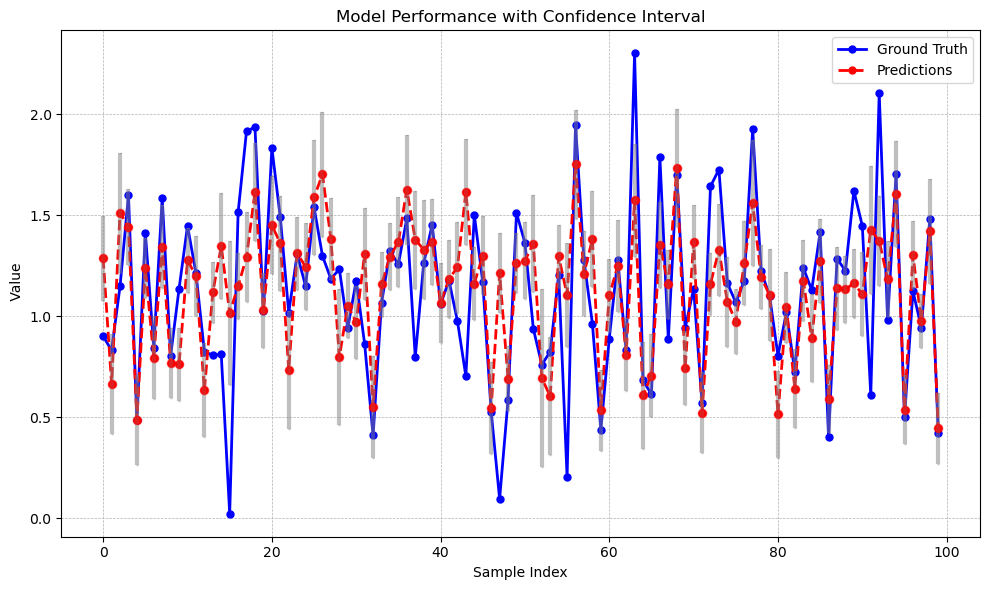

In [24]:
ground_truth = []
for _, targets in test_loader:
    ground_truth.extend(targets.numpy())

ground_truth = np.array(ground_truth)
ground_truth = output_scaler._untransform(torch.tensor(ground_truth))
# Convert predictions and std_dev to numpy
mean_predictions_np = mean_predictions.numpy().flatten()  # Adjust shape as necessary
std_predictions_np = std_predictions.numpy().flatten()  # Adjust shape as necessary



# Select a subset for plotting
num_samples_to_plot = 100
indices = np.random.randint(0, len(ground_truth) - 1, num_samples_to_plot)

# Slicing to select the subset
selected_ground_truth = ground_truth[indices]
selected_mean_predictions = mean_predictions_np[indices]
selected_std_predictions = std_predictions_np[indices]

# Plotting
plt.figure(figsize=(10, 6))

# X values (indices for the selected samples)
x_values = np.arange(num_samples_to_plot)

# Ground truth and predictions for the selected subset
plt.plot(x_values, selected_ground_truth, 'o-', label='Ground Truth', color='blue', linestyle='-', linewidth=2, markersize=5)
plt.plot(x_values, selected_mean_predictions, 'o--', label='Predictions', color='red', linestyle='--', linewidth=2, markersize=5)

# Error bars for the confidence interval (e.g., mean +/- 2*std_dev for 95% confidence interval)
error = 2 * selected_std_predictions
plt.errorbar(x_values, selected_mean_predictions, yerr=error, fmt='o', color='red', ecolor='gray', elinewidth=3, capsize=1, alpha=0.5)

plt.title('Model Performance with Confidence Interval')
plt.xlabel('Sample Index')
plt.ylabel(' Value')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()



### Createt Recurrent Neural Network for residual prediction

In [34]:
mean_predictions, std_predictions = ensemble_predict(ensemble_models, train_loader)
ground_truth = []
for _, targets in train_loader:
    ground_truth.extend(targets.numpy())

ground_truth = np.array(ground_truth)
ground_truth = output_scaler._untransform(torch.tensor(ground_truth))

In [48]:
rnn_input_cols = ['Charge at gun [pC]', 'Charge after BC1 [pC]', 'HXR electron energy [GeV]',
               'Bunch length at BC1', 'Bunch length at BC2']
residual = ground_truth - mean_predictions

In [49]:
# Split the dataset into training and testing sets
# train_df, test_df = train_test_split(final_df, test_size=0.2, random_state=39)

rnn_df = train_df[rnn_input_cols]
rnn_df['residual'] = residual_mae

rnn_input_mins = rnn_df[rnn_input_cols].min()
rnn_input_maxs = rnn_df[rnn_input_cols].max()
rnn_output_mins = rnn_df['residual'].min()
rnn_output_maxs = rnn_df['residual'].max()

rnn_input_size = len(rnn_input_cols)
rnn_output_size = 1
# Convert means and stds to PyTorch tensors
rnn_input_scaler = AffineInputTransform(d=rnn_input_size,coefficient=torch.tensor(rnn_input_maxs.values-rnn_input_mins.values, dtype=torch.float32),
                                                     offset=torch.tensor(rnn_input_mins.values, dtype=torch.float32))
rnn_output_scaler = AffineInputTransform(d=rnn_output_size,coefficient=torch.tensor(rnn_output_maxs-rnn_output_mins, dtype=torch.float32),
                                                     offset=torch.tensor(rnn_output_mins, dtype=torch.float32))

rnn_train_df, rnn_test_df = train_test_split(rnn_df, test_size=0.2, random_state=39)
rnn_train_df[rnn_input_cols] = rnn_input_scaler.transform(torch.tensor(rnn_train_df[rnn_input_cols].values, dtype=torch.float32))
rnn_test_df[rnn_input_cols] = rnn_input_scaler.transform(torch.tensor(rnn_test_df[rnn_input_cols].values, dtype=torch.float32))
rnn_train_df['residual'] = rnn_output_scaler.transform(torch.tensor(rnn_train_df['residual'].values, dtype=torch.float32))
rnn_test_df['residual'] = output_scaler.transform(torch.tensor(rnn_test_df['residual'].values, dtype=torch.float32))

In [61]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.num_layers = num_layers  # Define num_layers attribute
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # Output layer

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

# Instantiate the LSTM model
input_size = len(rnn_input_cols)  
hidden_size = 64  
num_layers = 3  
lstm_model = LSTMModel(input_size, hidden_size, num_layers)


input_sequences = torch.tensor(rnn_test_df[rnn_input_cols].values, dtype=torch.float32).unsqueeze(1)
target_residuals = torch.tensor(rnn_test_df['residual'].values, dtype=torch.float32).unsqueeze(-1).float()  # Compute residuals


In [53]:
# Training parameters
learning_rate = 0.001
num_epochs = 100
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)

# Train the LSTM model
for epoch in range(num_epochs):
    # Forward pass
    outputs = lstm_model(input_sequences)
    loss = criterion(outputs, target_sequences)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.0443
Epoch [20/100], Loss: 0.0247
Epoch [30/100], Loss: 0.0215
Epoch [40/100], Loss: 0.0204
Epoch [50/100], Loss: 0.0205
Epoch [60/100], Loss: 0.0203


KeyboardInterrupt: 

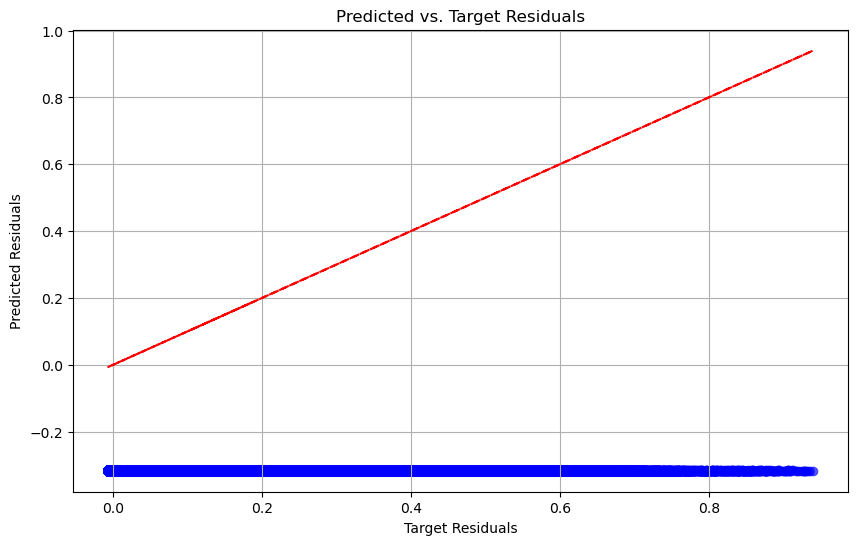

In [62]:
# Evaluate the LSTM model
with torch.no_grad():
    lstm_model.eval()
    predicted_residuals = lstm_model(input_sequences).numpy().flatten()

# Inverse transform the predicted residuals using output_scaler
predicted_residuals = rnn_output_scaler._untransform(torch.tensor(predicted_residuals, dtype=torch.float32))

# Inverse transform the target residuals using output_scaler
# target_residuals = rnn_output_scaler._untransform(torch.tensor(target_residuals, dtype=torch.float32))

# Calculate the Mean Squared Error (MSE) between predicted and target residuals
# mse = np.mean((predicted_residuals - target_residuals)**2)
# print(f"Mean Squared Error (MSE) on the testing set: {mse:.4f}")

# Plot predicted vs. target residuals
plt.figure(figsize=(10, 6))
plt.scatter(target_residuals, predicted_residuals, color='blue', alpha=0.6)
plt.plot(target_residuals, target_residuals, color='red', linestyle='--')
plt.title('Predicted vs. Target Residuals')
plt.xlabel('Target Residuals')
plt.ylabel('Predicted Residuals')
plt.grid(True)
plt.show()


### Save the ensemble

In [19]:
# Define base directory for saving models and scalers
model_path = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/model/'
ensemble_folder_name = datetime.now().strftime("%Y-%m-%d_%H-%M-%S") + '_ensemble/'
ensemble_path = os.path.join(model_path, ensemble_folder_name)

# Create directory if it does not exist
if not os.path.exists(ensemble_path):
    os.makedirs(ensemble_path)

torch.save(input_scaler, ensemble_path + 'lcls_fel_input_scaler.pt')
torch.save(output_scaler, ensemble_path + 'lcls_fel_output_scaler.pt')

# Save each model and its scalers
for idx, model in enumerate(ensemble_models):
    model_file_name = f'model_{idx}.pt'
    # input_scaler_file_name = f'input_scaler_{idx}.pt'
    # output_scaler_file_name = f'output_scaler_{idx}.pt'

    torch.save(model, os.path.join(ensemble_path, model_file_name))
    # torch.save(input_scaler, os.path.join(ensemble_path, input_scaler_file_name))
    # torch.save(output_scaler, os.path.join(ensemble_path, output_scaler_file_name))

file_name = 'feature_config.yaml'
with open(ensemble_path+file_name, 'w') as file:
    yaml.dump(yaml_dict, file, sort_keys=False)
print(f"Ensemble models and scalers saved in: {ensemble_path}")


Ensemble models and scalers saved in: /sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/model/2024-03-18_21-34-07_ensemble/


## Test model performance on specific dataset

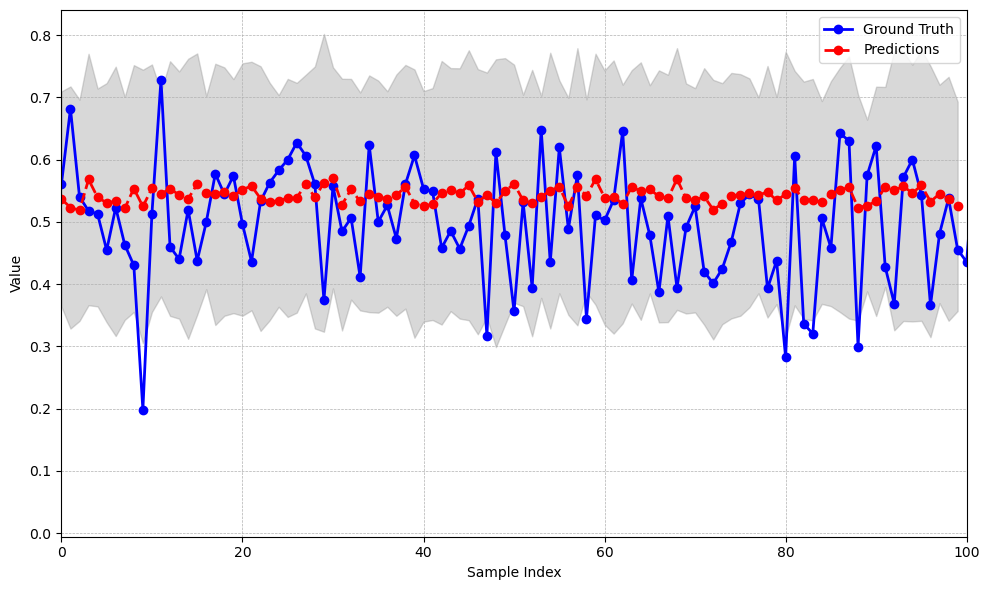

In [24]:
file_dir = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/dataset/'
pickle_files = 'hxr_archiver_Febtest_updated.pkl'
new_test_df = pd.read_pickle(file_dir+pickle_files).reset_index(drop=True)

new_test_df = dataset_filter(new_test_df)
# input_cols_bctrl = quads_inj_bctrl + quads_linac_bctrl + quads_ltuh_bctrl + beam_status
input_cols = quads_inj_bact + quads_linac_bact + quads_ltuh_bact #+ beam_status
output_cols = ['hxr_pulse_intensity']


num_samples_to_plot = 100
indices = np.random.randint(0, new_test_df.shape[0] - 1, num_samples_to_plot)
selected_new_test_df = new_test_df.iloc[indices]

selected_new_test_df[input_cols] = input_scaler.transform(torch.tensor(selected_new_test_df[input_cols].values, dtype=torch.float32))

# Initialize TestDataset with sampled data
new_test_data = MyDataset(selected_new_test_df, input_cols, output_cols)
# Create a DataLoader for test dataset
new_test_loader = DataLoader(new_test_data, batch_size=10, shuffle=False)
# use the ensemble_predict function
new_mean_predictions, new_std_predictions = ensemble_predict(ensemble_models, new_test_loader)
new_mean_predictions = output_scaler._untransform(new_mean_predictions)
new_std_predictions = output_scaler._untransform(new_std_predictions)


ground_truth = new_test_df[output_cols].values

# Plotting
plt.figure(figsize=(10, 6))
shot_axis = np.arange(len(ground_truth))

# Ground truth and predictions for the selected subset
plt.plot(ground_truth, label='Ground Truth', color='blue', linestyle='-', marker='o', linewidth=2)
plt.plot(new_mean_predictions, label='Predictions', color='red', linestyle='--', marker='o', linewidth=2)
# plt.plot(new_mean_predictions_loaded, label='Predictions1', color='orange', linestyle='--', marker='o', linewidth=2)

# Confidence interval (e.g., mean +/- 2*std_dev for 95% confidence interval) for the selected subset
lower_bound = (new_mean_predictions - 2 * new_std_predictions).numpy().flatten()
upper_bound = (new_mean_predictions + 2 * new_std_predictions).numpy().flatten()
plt.fill_between(range(num_samples_to_plot), lower_bound, upper_bound, color='gray', alpha=0.3)


plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.xlim([0, num_samples_to_plot])
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

### Load another ensemble models and corresponding scaler

In [17]:
def load_ensemble_models(model_path, ensemble_name):
    """
    Load an ensemble of models along with input and output scalers.

    Parameters:
    - model_path: The base directory where the ensemble folder is located.
    - ensemble_name: The name of the ensemble folder.

    Returns:
    - loaded_models: A list of loaded PyTorch models.
    - loaded_input_scaler: The loaded input scaler.
    - loaded_output_scaler: The loaded output scaler.
    - loaded_input_cols: A list of input feature names.
    - loaded_output_cols: A list of output feature names.

    Raises:
    - FileNotFoundError: If any of the required files cannot be found.
    """
    ensemble_full_path = os.path.join(model_path, ensemble_name)

    # Check if ensemble directory exists
    if not os.path.exists(ensemble_full_path):
        raise FileNotFoundError(f"Ensemble directory {ensemble_full_path} does not exist.")

    # Load the YAML file
    vars_path = os.path.join(ensemble_full_path, 'feature_config.yaml')
    if not os.path.exists(vars_path):
        raise FileNotFoundError(f"Feature configuration file {vars_path} not found.")

    with open(vars_path, 'r') as file:
        config = yaml.safe_load(file)

    # Extract input and output columns
    loaded_input_cols = list(config['input_variables'].keys())
    loaded_output_cols = list(config['output_variables'].keys())

    # Load input and output scalers
    input_scaler_path = os.path.join(ensemble_full_path, 'lcls_fel_input_scaler.pt')
    output_scaler_path = os.path.join(ensemble_full_path, 'lcls_fel_output_scaler.pt')

    if not os.path.exists(input_scaler_path) or not os.path.exists(output_scaler_path):
        raise FileNotFoundError("One or both scaler files not found.")

    loaded_input_scaler = torch.load(input_scaler_path)
    loaded_output_scaler = torch.load(output_scaler_path)

    # Load each model
    loaded_models = []
    model_filenames = [f for f in os.listdir(ensemble_full_path) if f.startswith("model")]

    if not model_filenames:
        raise FileNotFoundError("No model files found in the ensemble directory.")

    sorted_model_filenames = sorted(
        model_filenames, key=lambda x: int(x.split('_')[1].split('.')[0])
    )

    for model_filename in sorted_model_filenames:
        each_model_path = os.path.join(ensemble_full_path, model_filename)
        if not os.path.exists(each_model_path):
            raise FileNotFoundError(f"Model file {each_model_path} not found.")
        model = torch.load(each_model_path)
        loaded_models.append(model)

    print(f"Ensemble models {ensemble_name} and scalers loaded successfully.")
    return loaded_models, loaded_input_scaler, loaded_output_scaler, loaded_input_cols, loaded_output_cols


In [18]:
def predict_with_ensemble(test_df, models,
                                 input_cols, output_cols,
                                 input_scaler, output_scaler,
                                 batch_size=10):
    # Sample a subset from the new_test_df if necessary or perform any preprocessing
    # For this example, assuming new_test_df is ready to be used directly

    # Apply input scaler transformation
    new_test_df = test_df
    # inputs_scaled = input_scaler.transform(torch.tensor(new_test_df[input_cols].values, dtype=torch.float32))
    new_test_df[input_cols] = input_scaler.transform(torch.tensor(new_test_df[input_cols].values, dtype=torch.float32))

    # Initialize TestDataset with processed data
    new_test_data = MyDataset(new_test_df, input_cols, output_cols)

    # Create a DataLoader for test dataset
    new_test_loader = DataLoader(new_test_data, batch_size=batch_size, shuffle=False)

    # Use the ensemble_predict function
    mean_predictions, std_predictions = ensemble_predict(models, new_test_loader)

    # Apply output scaler un-transformation
    mean_predictions = output_scaler._untransform(mean_predictions)
    std_predictions = output_scaler._untransform(std_predictions)
    return mean_predictions, std_predictions
    
def eval_cover_perc(ground_truth, lower_bound, upper_bound):
    covered_count = 0
    # Loop through each prediction
    for i in range(len(ground_truth)):
        # Check if the ground truth falls within the confidence interval
        if lower_bound[i] <= ground_truth[i] <= upper_bound[i]:
            covered_count += 1
    
    # Calculate percentage
    coverage_percentage = (covered_count / len(ground_truth)) * 100
    return coverage_percentage
    

In [19]:
file_dir = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/dataset/'
pickle_files = 'hxr_archiver_Sep_updated.pkl'
new_test_df = pd.read_pickle(file_dir+pickle_files).reset_index(drop=True)
new_test_df = dataset_filter(new_test_df)[:]
print('Number of effective samples in test set:', new_test_df.shape[0])

# input_cols_bctrl = quads_inj_bctrl + quads_linac_bctrl + quads_ltuh_bctrl + beam_status
input_cols = quads_inj_bact + quads_linac_bact + quads_ltuh_bact + beam_status
output_cols = ['hxr_pulse_intensity']

# Calculate moving average with a window
window_size = 100
moving_avg = new_test_df[output_cols].rolling(window=window_size).mean()

# Display the original data and the moving average
# new_test_df_updated = new_test_df.copy()
new_test_df['moving_avg'] = moving_avg

sample_interval = 10
indices = np.round(np.arange(0,new_test_df.shape[0] - 1,sample_interval))[:]
# ----------------------
# num_samples_to_plot = 100
# indices = np.random.randint(0, new_test_df.shape[0] - 1, num_samples_to_plot)
# --------------------------
print('Number of samples for model validation:', indices.shape[0])
num_samples_to_plot = indices.shape[0]
ground_truth = new_test_df[output_cols].iloc[indices].values
ground_truth_moving_avg = new_test_df['moving_avg'].iloc[indices].values

Number of effective samples in test set: 772398
Number of samples for model validation: 77240


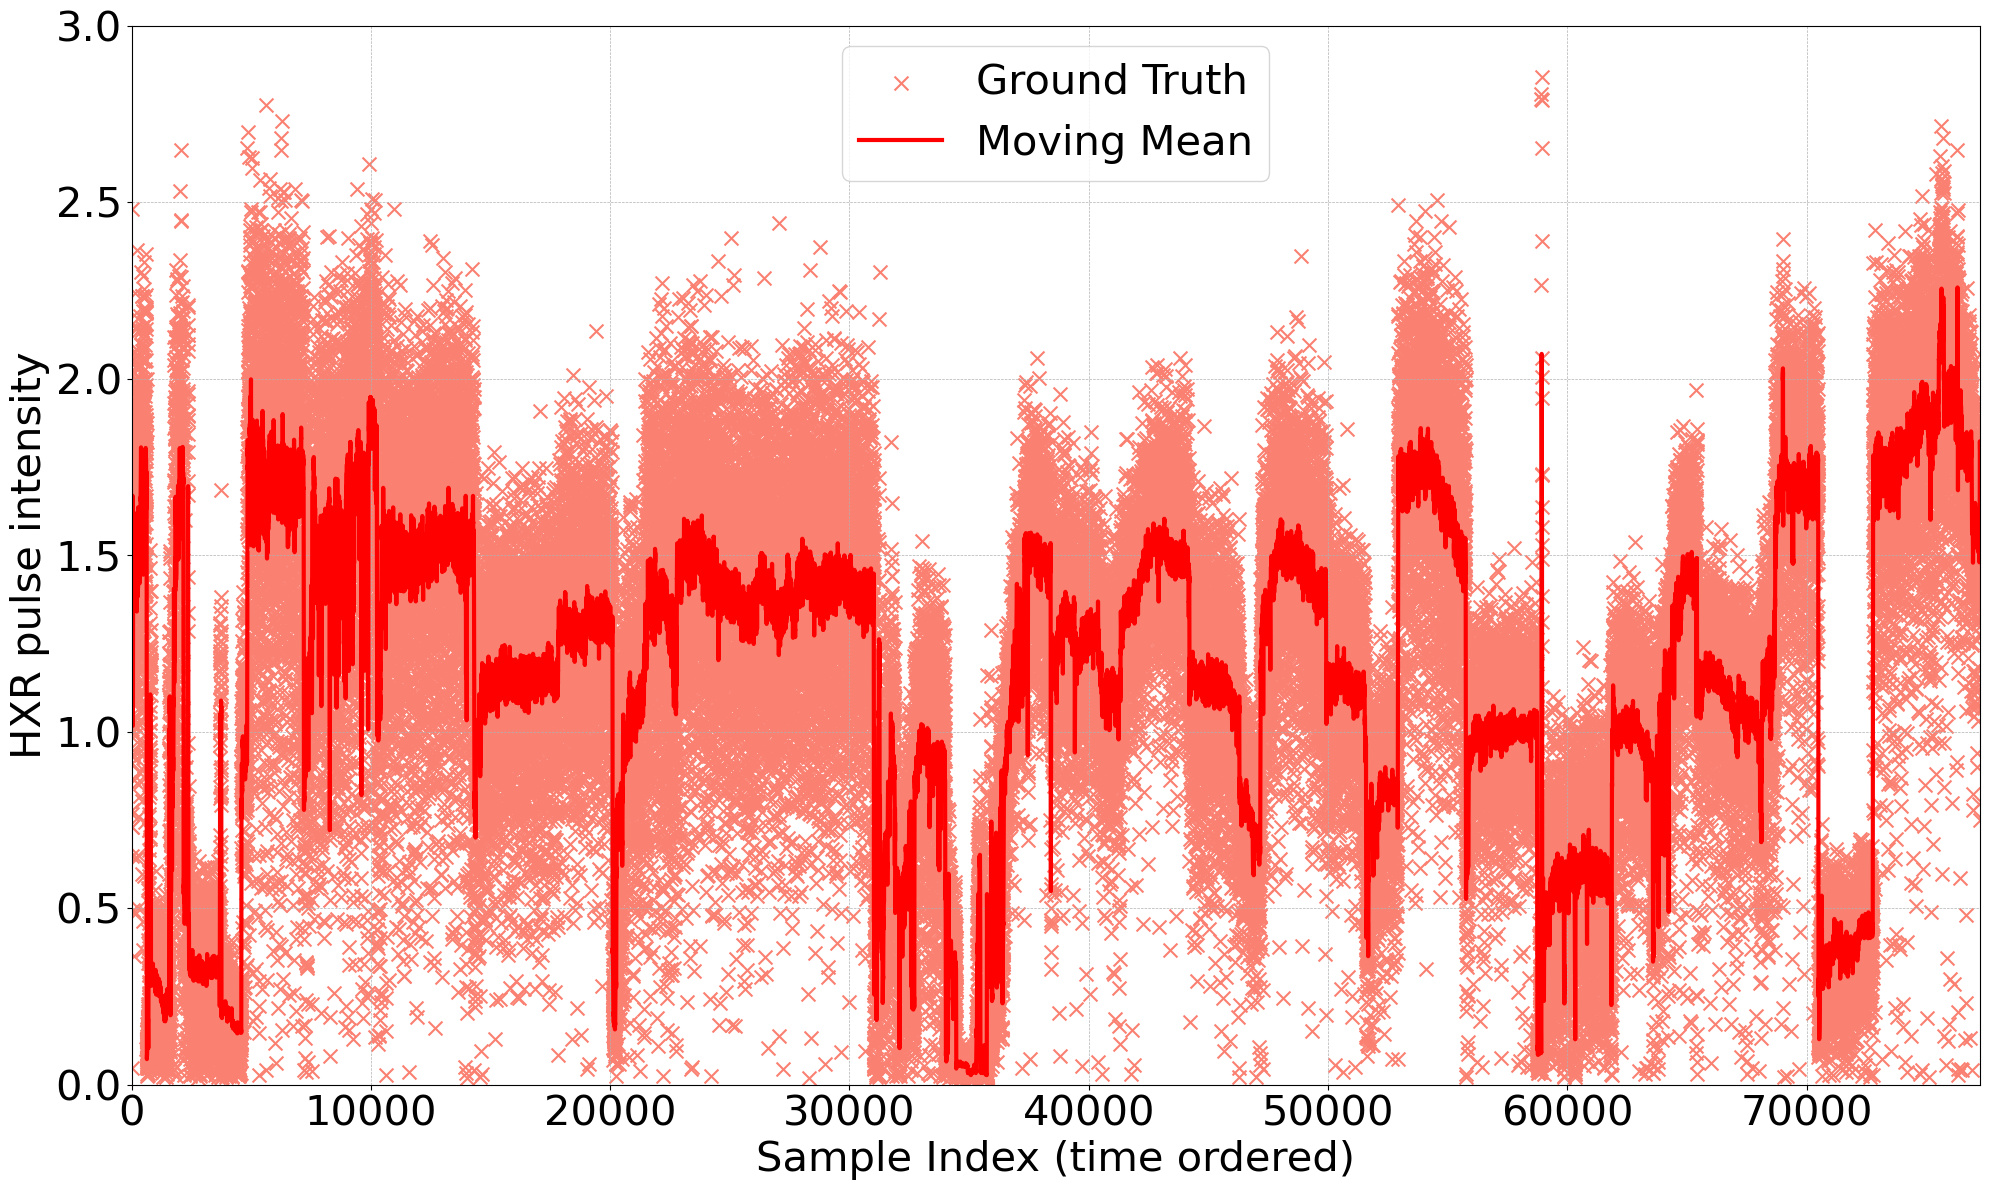

In [20]:
shot_axis = np.arange(len(ground_truth))
plt.figure(figsize=(20,12))
plt.scatter(shot_axis, ground_truth, label='Ground Truth', color='salmon', marker='x',s=100)
plt.plot(ground_truth_moving_avg, label='Moving Mean', color='red', linewidth=3)
fontsize = 30
plt.xlabel('Sample Index (time ordered)', fontsize=fontsize)
plt.ylabel('HXR pulse intensity',fontsize=fontsize)
plt.xlim([0, num_samples_to_plot])
plt.ylim([-0, 3])
plt.legend(fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

In [24]:
model_path = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/model/'  
ensemble_name1 = '2024-03-13_00-58-52_ensemble/'
loaded_models1, loaded_input_scaler1, loaded_output_scaler1, loaded_input_cols1, loaded_output_cols1 = load_ensemble_models(model_path, ensemble_name1)
new_mean_predictions_loaded1, new_std_predictions_loaded1 = predict_with_ensemble(test_df=new_test_df.iloc[indices],
                                                                               models=loaded_models1,        
                                                                               input_cols=loaded_input_cols1, 
                                                                               output_cols=loaded_output_cols1,
                                                                               input_scaler=loaded_input_scaler1,
                                                                               output_scaler=loaded_output_scaler1)
# ensemble_name2 = '2024-02-26_15-26-14_ensemble/' #'2024-02-23_01-00-17_ensemble/'
# loaded_models2, loaded_input_scaler2, loaded_output_scaler2, loaded_input_cols2, loaded_output_cols2 = load_ensemble_models(model_path, ensemble_name2)
# new_mean_predictions_loaded2, new_std_predictions_loaded2 = predict_with_loaded_ensemble(test_df=new_test_df.iloc[indices],
#                                                                                loaded_models=loaded_models2,        
#                                                                                input_cols=loaded_input_cols2, 
#                                                                                output_cols=loaded_output_cols2,
#                                                                                loaded_input_scaler=loaded_input_scaler2,
#                                                                                loaded_output_scaler=loaded_output_scaler2)

# ensemble_name3 = '2024-02-26_15-26-14_ensemble/'
# loaded_models3, loaded_input_scaler3, loaded_output_scaler3, loaded_input_cols3, loaded_output_cols3 = load_ensemble_models(model_path, ensemble_name3)
# new_mean_predictions_loaded2, new_std_predictions_loaded2 = predict_with_loaded_ensemble(test_df=new_test_df.iloc[indices],
#                                                                                loaded_models=loaded_models3,        
#                                                                                input_cols=loaded_input_cols3, 
#                                                                                output_cols=loaded_output_cols2,
#                                                                                loaded_input_scaler=loaded_input_scaler2,
#                                                                                loaded_output_scaler=loaded_output_scaler2)

Ensemble models 2024-03-13_00-58-52_ensemble/ and scalers loaded successfully.


Percentage of predictions where the confidence interval covers the ground truth: 0.00%


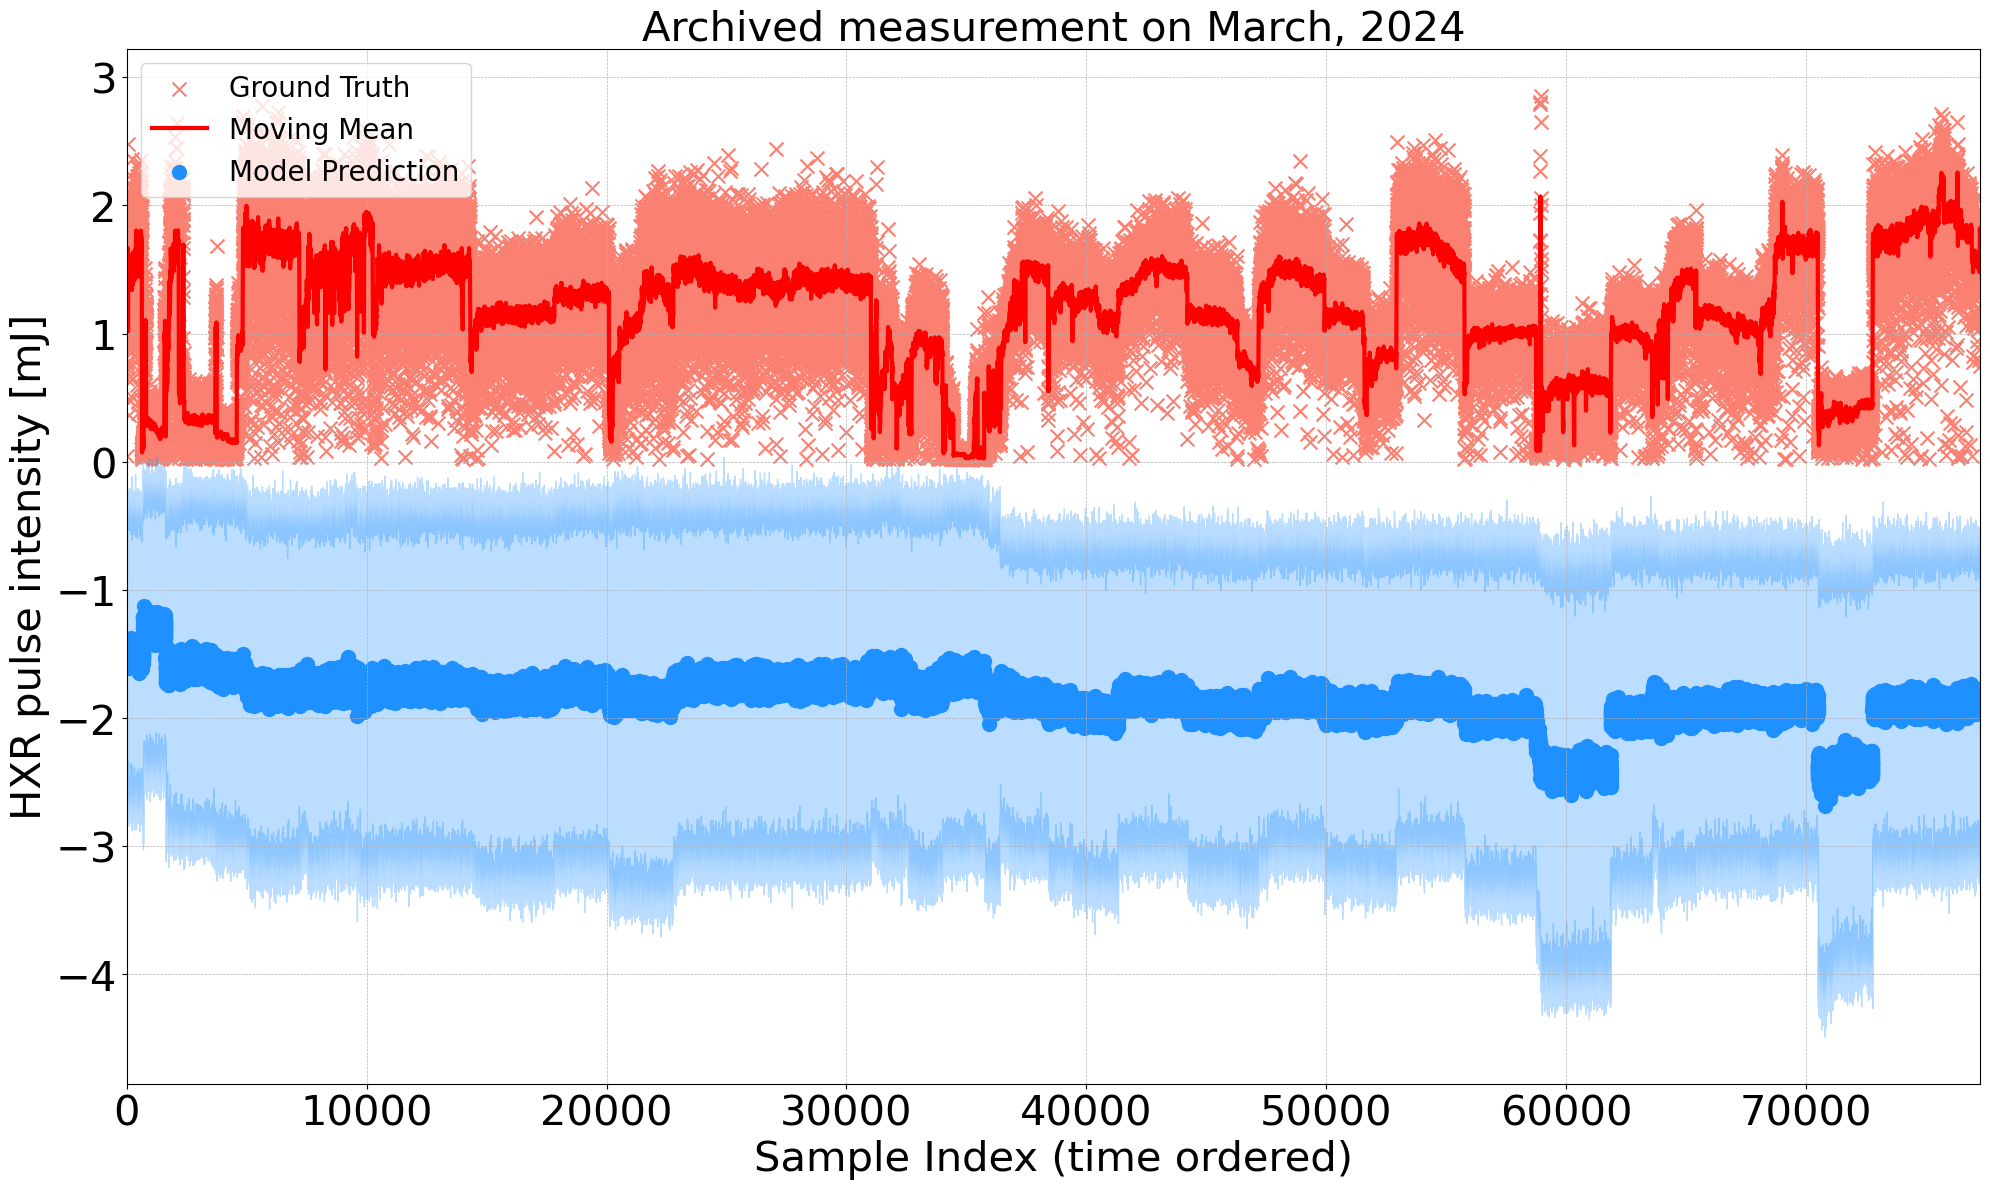

In [26]:
# plotting
fontsize = 30
plt.figure(figsize=(20,12))
shot_axis = np.arange(len(ground_truth))
# Ground truth and predictions for the selected a subset

plt.scatter(shot_axis, ground_truth, label='Ground Truth', color='salmon', marker='x',s=100)

# plt.scatter(shot_axis, new_mean_predictions_loaded2, label='Model2 prediction', color='yellowgreen', marker='o', s=100)

plt.plot(ground_truth_moving_avg, label='Moving Mean', color='red', linewidth=3)
plt.scatter(shot_axis, new_mean_predictions_loaded1, label='Model Prediction', color='dodgerblue', marker='o', s=100)
# Confidence interval (e.g., mean +/- 2*std_dev for 95% confidence interval) for the selected subset
lower_bound1 = (new_mean_predictions_loaded1 - 2 * new_std_predictions_loaded1).numpy().flatten()
upper_bound1 = (new_mean_predictions_loaded1 + 2 * new_std_predictions_loaded1).numpy().flatten()
plt.fill_between(range(num_samples_to_plot), lower_bound1, upper_bound1, color='dodgerblue', alpha=0.3)

cover_perc1 = eval_cover_perc(ground_truth, lower_bound1, upper_bound1)
print(f"Percentage of predictions where the confidence interval covers the ground truth: {cover_perc1:.2f}%")
    
# lower_bound2 = (new_mean_predictions_loaded2 - 2 * new_std_predictions_loaded2).numpy().flatten()
# upper_bound2 = (new_mean_predictions_loaded2 + 2 * new_std_predictions_loaded2).numpy().flatten()
# plt.fill_between(range(num_samples_to_plot), lower_bound2, upper_bound2, color='yellowgreen', alpha=0.3)

plt.xlabel('Sample Index (time ordered)', fontsize=fontsize)
plt.ylabel('HXR pulse intensity [mJ]',fontsize=fontsize)
plt.title('Archived measurement on March, 2024',fontsize=fontsize)
plt.xlim([0, num_samples_to_plot])
# plt.ylim([-0, 2.5])
plt.legend(fontsize=20, loc='upper left')
plt.tick_params(labelsize=fontsize)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

### Scan each quads within the range from [25th percentiles, 75th percentiles] and use model for prediction

In [28]:
for i in range(len(loaded_input_cols1)):
    lower_limit = final_df[input_cols[i]].min() #np.percentile(final_df[input_cols[i]], 25)
    upper_limit = final_df[input_cols[i]].max() #np.percentile(final_df[input_cols[i]], 75)
    print(input_cols[i])
    print((lower_limit+upper_limit)/2)
    print(f'[{lower_limit}, {upper_limit}]')

QUAD:IN20:121:BACT
-5.226077812827898e-06
[-0.015006836412798557, 0.0149963842571729]
QUAD:IN20:122:BACT
5.1917624235182924e-06
[-0.014913217430234292, 0.014923600955081329]
QUAD:IN20:361:BACT
-3.2365292528918355
[-4.030439862310379, -2.442618643473292]
QUAD:IN20:371:BACT
2.951741615816302
[2.3446203106030783, 3.558862921029526]
QUAD:IN20:425:BACT
-2.1430241006512833
[-4.286606921758363, 0.0005587204557963784]
QUAD:IN20:441:BACT
0.8913001796510637
[-0.8086915998529676, 2.591291959155095]
QUAD:IN20:511:BACT
2.7992580124572175
[1.1209045518079914, 4.477611473106443]
QUAD:IN20:525:BACT
-2.9396783633479577
[-5.662729702644317, -0.2166270240515991]
QUAD:LI21:201:BACT
-4.98328024638117
[-8.39997833489636, -1.5665821578659795]
QUAD:LI21:211:BACT
5.000311277525322
[3.000037369370781, 7.000585185679862]
QUAD:LI21:221:BACT
-0.059827596742249134
[-0.7995274694302805, 0.6798722759457823]
QUAD:LI21:251:BACT
-0.18009533692999963
[-1.1072886447558759, 0.7470979708958766]
QUAD:LI21:271:BACT
-5.4268368

In [18]:
# load ensemble models

# model_path = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/model/'  
# ensemble_name1 = '2024-02-28_20-25-33_ensemble/'
# loaded_models1, loaded_input_scaler1, loaded_output_scaler1, loaded_input_cols1, loaded_output_cols1 = load_ensemble_models(model_path, ensemble_name1)

# load classic NN model
# Specify the path to the saved files
model_path = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/model/'  
model_version = '2024-03-14_17-10-34'
loaded_model_path = model_path + model_version + '_lcls_fel_model.pt'
loaded_input_scaler_path = model_path + model_version + '_lcls_fel_input_scaler.pt'
loaded_output_scaler_path = model_path + model_version + '_lcls_fel_output_scaler.pt'

# Load the model state dictionary
model = torch.load(loaded_model_path)

# Load the model state dictionary
input_scaler = torch.load(loaded_input_scaler_path)
output_scaler = torch.load(loaded_output_scaler_path)

In [26]:
input_cols = ['QUAD:IN20:121:BACT',
 'QUAD:IN20:122:BACT',
 'QUAD:IN20:361:BACT',
 'QUAD:IN20:371:BACT',
 'QUAD:IN20:425:BACT',
 'QUAD:IN20:441:BACT',
 'QUAD:IN20:511:BACT',
 'QUAD:IN20:525:BACT',
 'QUAD:LI21:201:BACT',
 'QUAD:LI21:211:BACT',
 'QUAD:LI21:221:BACT',
 'QUAD:LI21:251:BACT',
 'QUAD:LI21:271:BACT',
 'QUAD:LI21:278:BACT',
 'QUAD:LI24:740:BACT',
 'QUAD:LI24:860:BACT',
 'QUAD:LI26:201:BACT',
 'QUAD:LI26:301:BACT',
 'QUAD:LI26:401:BACT',
 'QUAD:LI26:501:BACT',
 'QUAD:LI26:601:BACT',
 'QUAD:LI26:701:BACT',
 'QUAD:LI26:801:BACT',
 'QUAD:LI26:901:BACT',
 'QUAD:LTUH:440:BACT',
 'QUAD:LTUH:460:BACT',
 'QUAD:LTUH:620:BACT',
 'QUAD:LTUH:640:BACT',
 'QUAD:LTUH:660:BACT',
 'QUAD:LTUH:680:BACT']
 # 'Charge at gun [pC]',
 # 'Charge after BC1 [pC]',
 # 'HXR electron energy [GeV]',
 # 'Bunch length at BC1',
 # 'Bunch length at BC2']

In [24]:
len(input_cols)

35

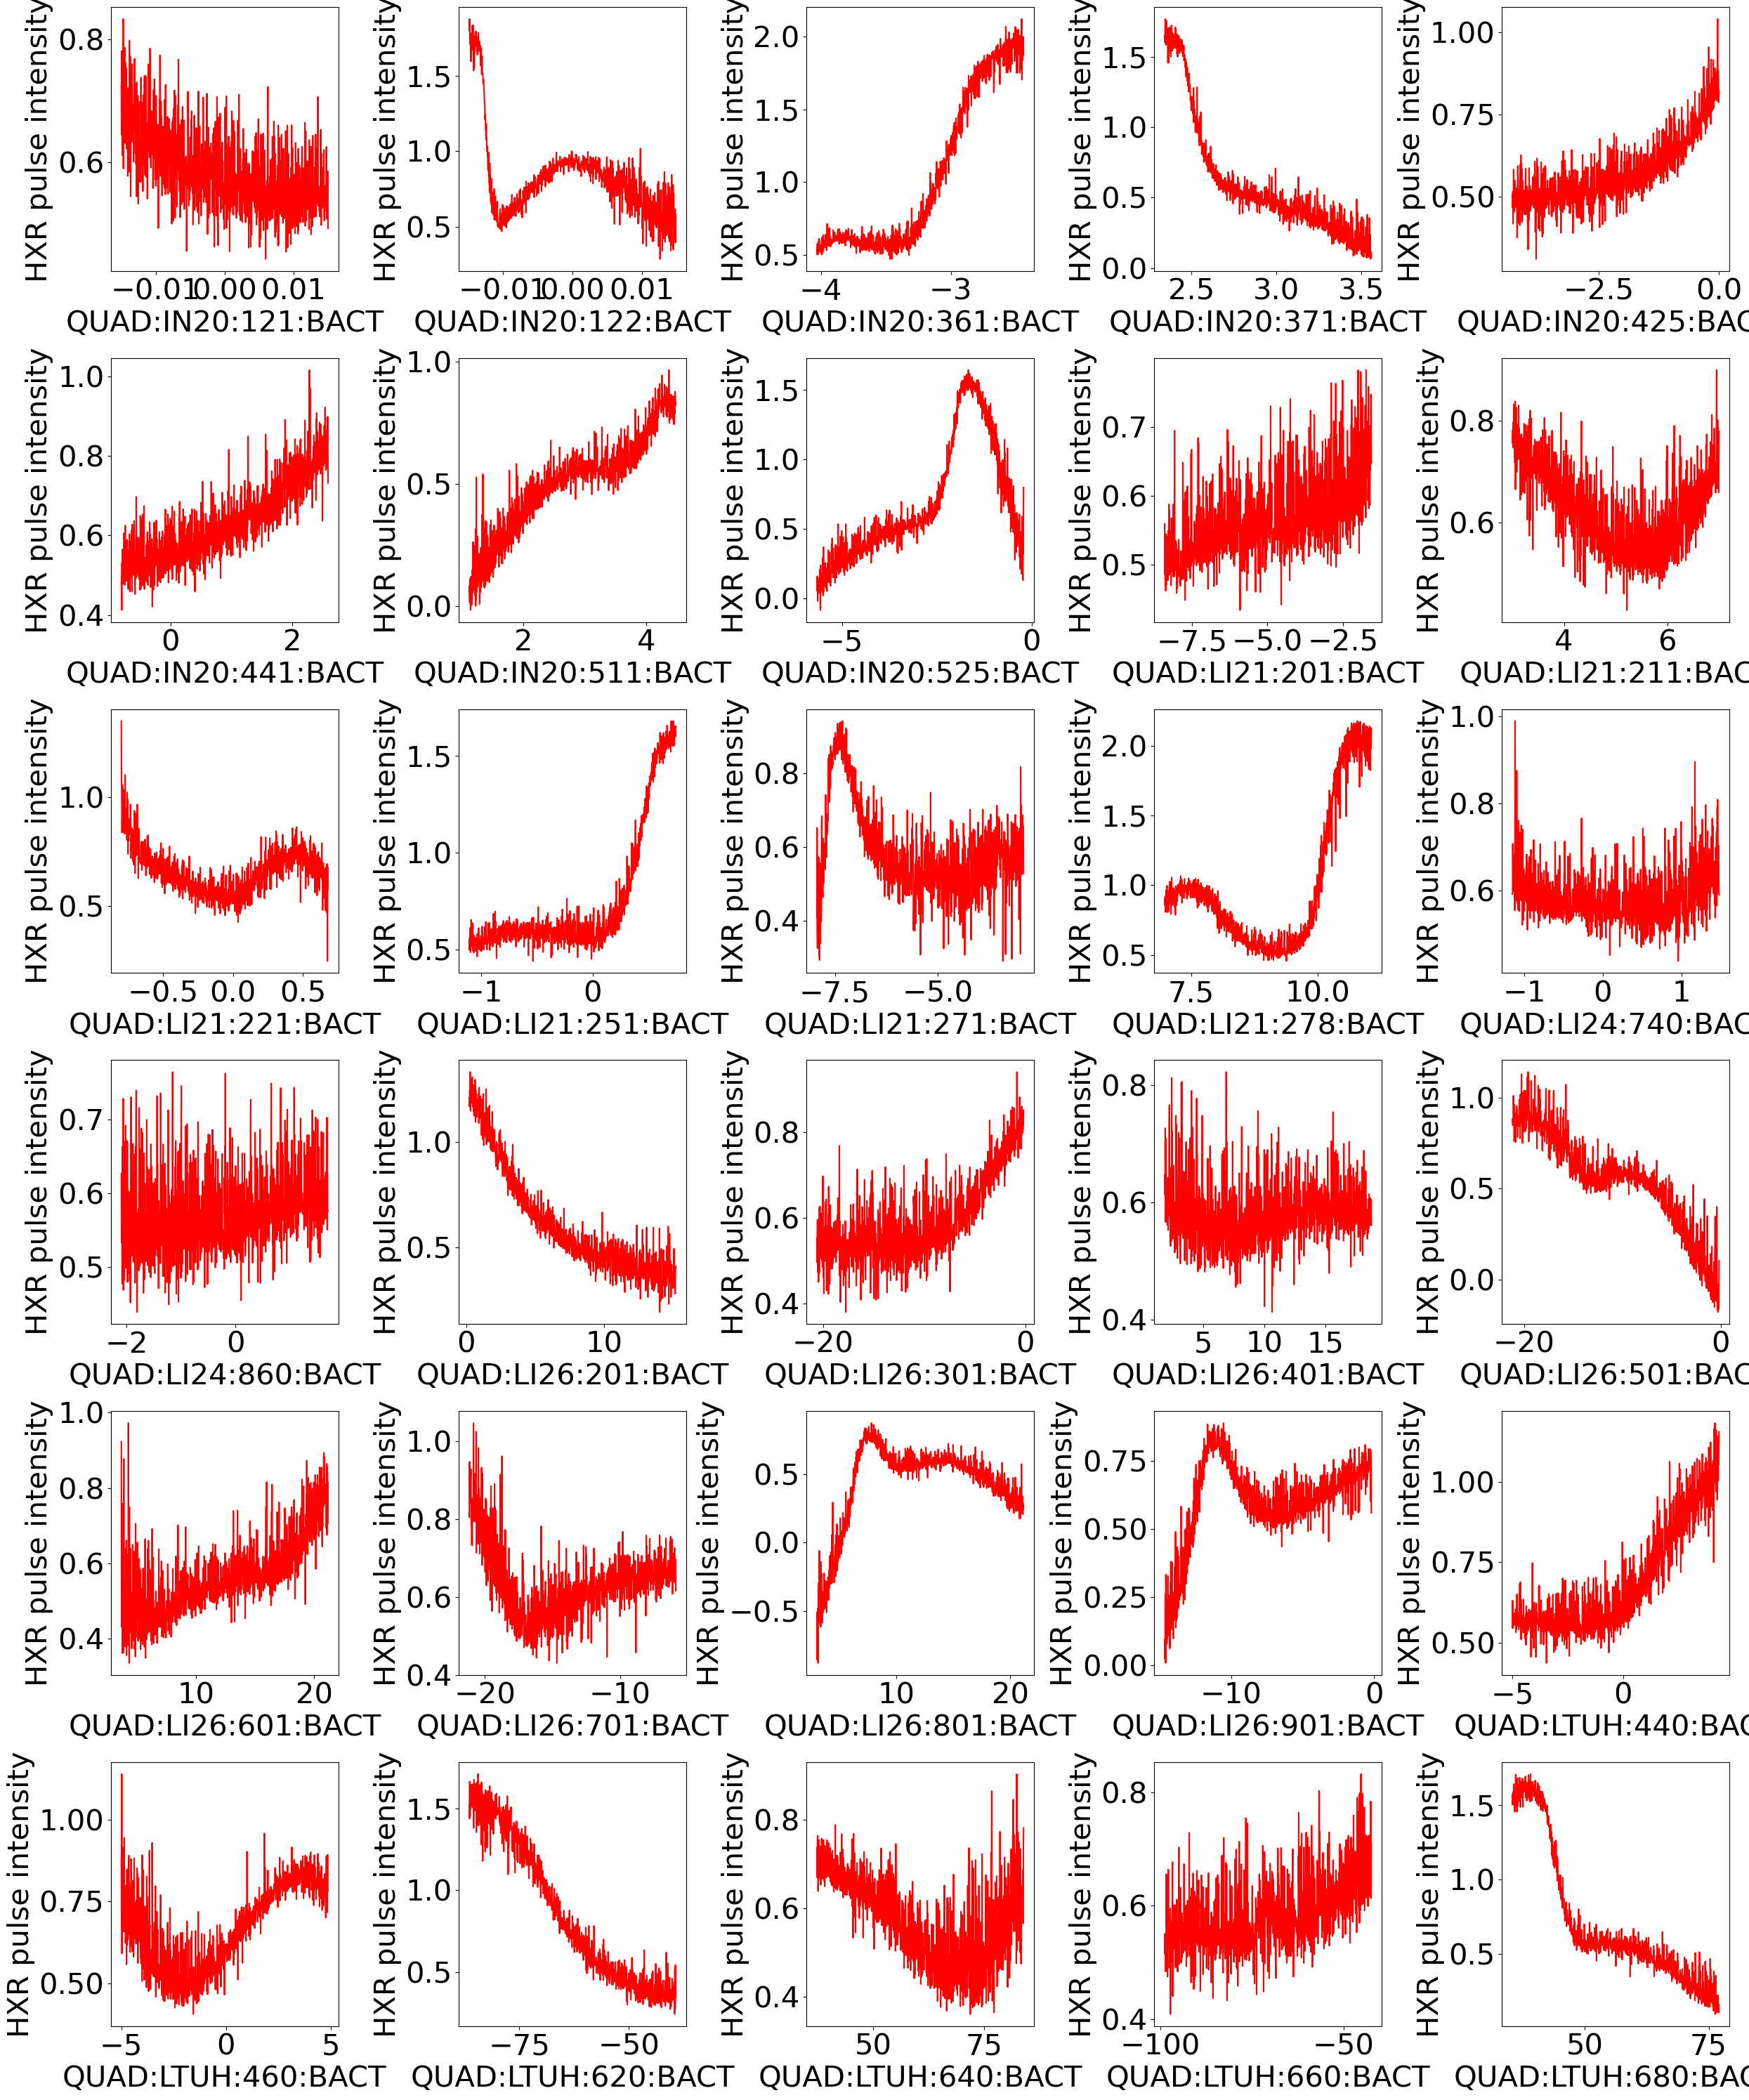

In [32]:
nrows, ncols = 6, 5
figsize = (25, 25 * nrows / ncols)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=False, figsize=figsize)

for i in range(nrows * ncols):
    ax_i = ax[i // ncols, i % ncols]
    column_name = loaded_input_cols1[i]
    lower_limit = final_df[column_name].min() #np.percentile(final_df[column_name], 25)
    upper_limit = final_df[column_name].max() #np.percentile(final_df[column_name], 75)
    step = (upper_limit - lower_limit) / 1000  # define  step size
    
    mean_row = pd.DataFrame(final_df.mean()).transpose()
    # Create an empty DataFrame to store the results
    scanned_df = pd.DataFrame(columns=final_df.columns)
    
    # Iterate over the range of values for the specific column
    for i, value in enumerate(np.arange(lower_limit, upper_limit + step, step)):
        new_row = mean_row.copy()
        new_row.at[0, column_name] = value  
        scanned_df = pd.concat([scanned_df, new_row], ignore_index=True)

    scaled_inputs = input_scaler.transform(torch.tensor(scanned_df[input_cols].values.astype('float32'), dtype=torch.float32)) # for botorch
    model_outputs = model(scaled_inputs)
    
    # Inverse transform the model outputs using the output_scaler
    model_predictions = output_scaler._untransform(model_outputs).detach().numpy() # for botorch  
    
    ax_i.plot(scanned_df[column_name], model_predictions, color="red")
    ax_i.set_xlabel(column_name, fontsize=fontsize)
    ax_i.tick_params(labelsize=fontsize)
    ax_i.set_ylabel("HXR pulse intensity", fontsize=fontsize)
    
    # Hide y-axis label for all but the first subplot in each row
    # if i % ncols != 0:
    #     ax_i.label_outer()

fig.tight_layout()
plt.show()


### Debugging below

Series([], Name: QUAD:IN20:371:BACT, dtype: object)
0      2.344620
1      2.356763
2      2.368905
3      2.381048
4      2.393190
5      2.405332
6      2.417475
7      2.429617
8      2.441760
9      2.453902
10     2.466045
11     2.478187
12     2.490329
13     2.502472
14     2.514614
15     2.526757
16     2.538899
17     2.551042
18     2.563184
19     2.575326
20     2.587469
21     2.599611
22     2.611754
23     2.623896
24     2.636039
25     2.648181
26     2.660323
27     2.672466
28     2.684608
29     2.696751
30     2.708893
31     2.721036
32     2.733178
33     2.745320
34     2.757463
35     2.769605
36     2.781748
37     2.793890
38     2.806033
39     2.818175
40     2.830317
41     2.842460
42     2.854602
43     2.866745
44     2.878887
45     2.891029
46     2.903172
47     2.915314
48     2.927457
49     2.939599
50     2.951742
51     2.963884
52     2.976026
53     2.988169
54     3.000311
55     3.012454
56     3.024596
57     3.036739
58     3.048881
59  

Text(0, 0.5, 'HXR pulse intensity')

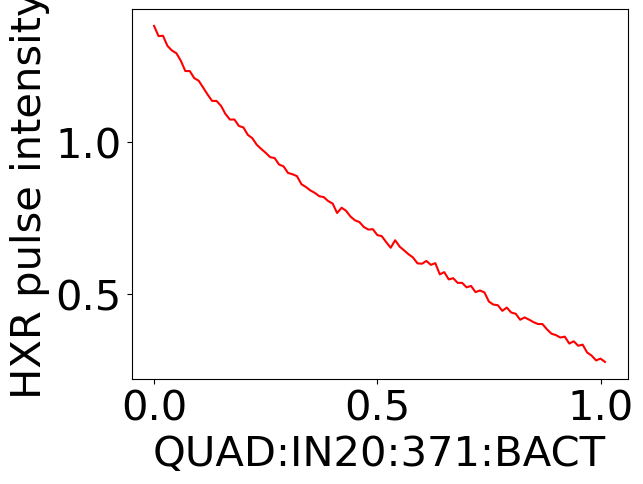

In [34]:
column_name = loaded_input_cols1[3]
lower_limit = final_df[column_name].min() #np.percentile(final_df[column_name], 25)
upper_limit = final_df[column_name].max() #np.percentile(final_df[column_name], 75)
step = (upper_limit - lower_limit) / 100  # define  step size

mean_row = pd.DataFrame(final_df.mean()).transpose()
# Create an empty DataFrame to store the results
scanned_df = pd.DataFrame(columns=final_df.columns)
print(scanned_df[column_name])
# Iterate over the range of values for the specific column
for i, value in enumerate(np.arange(lower_limit, upper_limit + step, step)):
    new_row = mean_row.copy()
    new_row.at[0, column_name] = value  
    scanned_df = pd.concat([scanned_df, new_row], ignore_index=True)
    # print(scanned_df.iloc[1])
print(scanned_df[column_name])
print(scanned_df.iloc[1])
new_mean_predictions_loaded1, new_std_predictions_loaded1 = predict_with_ensemble(test_df=scanned_df,
                                                                           models=loaded_models1,        
                                                                           input_cols=loaded_input_cols1, 
                                                                           output_cols=loaded_output_cols1,
                                                                           input_scaler=loaded_input_scaler1,
                                                                           output_scaler=loaded_output_scaler1)
    # scaled_inputs = input_scaler.transform(torch.tensor(scanned_df[input_cols].values.astype('float32'), dtype=torch.float32)) # for botorch
    # model_outputs = model(scaled_inputs)

    # # Inverse transform the model outputs using the output_scaler
    # # final_output = output_scaler.inverse_transform(model_outputs.detach().numpy()) # for sklearn
    # final_output = output_scaler._untransform(model_outputs).detach().numpy() # for botorch  
print(scanned_df[column_name])
print(scanned_df.iloc[1])
plt.plot(scanned_df[column_name], new_mean_predictions_loaded1, color="red")
plt.xlabel(column_name, fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel("HXR pulse intensity", fontsize=fontsize)

In [79]:
scanned_df

,QUAD:IN20:121:BACT,QUAD:IN20:122:BACT,QUAD:IN20:361:BACT,QUAD:IN20:371:BACT,QUAD:IN20:425:BACT,QUAD:IN20:441:BACT,QUAD:IN20:511:BACT,QUAD:IN20:525:BACT,QUAD:LI21:201:BACT,QUAD:LI21:211:BACT,QUAD:LI21:221:BACT,QUAD:LI21:251:BACT,QUAD:LI21:271:BACT,QUAD:LI21:278:BACT,QUAD:LI24:740:BACT,QUAD:LI24:860:BACT,QUAD:LI26:201:BACT,QUAD:LI26:301:BACT,QUAD:LI26:401:BACT,QUAD:LI26:501:BACT,QUAD:LI26:601:BACT,QUAD:LI26:701:BACT,QUAD:LI26:801:BACT,QUAD:LI26:901:BACT,QUAD:LTUH:440:BACT,QUAD:LTUH:460:BACT,QUAD:LTUH:620:BACT,QUAD:LTUH:640:BACT,QUAD:LTUH:660:BACT,QUAD:LTUH:680:BACT,QUAD:LTUS:640:BACT,QUAD:LTUS:660:BACT,QUAD:LTUS:680:BACT,hxr_pulse_intensity,Bunch length at BC1,Bunch length at BC2,Charge at gun [pC],Charge after BC1 [pC],HXR electron energy [GeV],HXR photon energy [eV],laser_iris_status
0,0.512148,0.175246,0.382173,0.0,0.589829,0.308203,0.654726,0.521768,0.544628,0.488991,0.416132,0.558485,0.313391,0.458175,0.612171,0.48509,0.427138,0.565628,0.433582,0.494326,0.63168,0.447849,0.435547,0.556031,0.355801,0.467254,0.608951,0.392237,0.4691,0.361976,-32.403344,21.719125,-16.27842,1.000744,0.259237,0.157371,0.505946,0.894279,0.284164,0.585656,4.0
1,0.512148,0.175246,0.382173,0.1,0.589829,0.308203,0.654726,0.521768,0.544628,0.488991,0.416132,0.558485,0.313391,0.458175,0.612171,0.48509,0.427138,0.565628,0.433582,0.494326,0.63168,0.447849,0.435547,0.556031,0.355801,0.467254,0.608951,0.392237,0.4691,0.361976,-32.403344,21.719125,-16.27842,1.000744,0.259237,0.157371,0.505946,0.894279,0.284164,0.585656,4.0
2,0.512148,0.175246,0.382173,0.2,0.589829,0.308203,0.654726,0.521768,0.544628,0.488991,0.416132,0.558485,0.313391,0.458175,0.612171,0.48509,0.427138,0.565628,0.433582,0.494326,0.63168,0.447849,0.435547,0.556031,0.355801,0.467254,0.608951,0.392237,0.4691,0.361976,-32.403344,21.719125,-16.27842,1.000744,0.259237,0.157371,0.505946,0.894279,0.284164,0.585656,4.0
3,0.512148,0.175246,0.382173,0.3,0.589829,0.308203,0.654726,0.521768,0.544628,0.488991,0.416132,0.558485,0.313391,0.458175,0.612171,0.48509,0.427138,0.565628,0.433582,0.494326,0.63168,0.447849,0.435547,0.556031,0.355801,0.467254,0.608951,0.392237,0.4691,0.361976,-32.403344,21.719125,-16.27842,1.000744,0.259237,0.157371,0.505946,0.894279,0.284164,0.585656,4.0
4,0.512148,0.175246,0.382173,0.4,0.589829,0.308203,0.654726,0.521768,0.544628,0.488991,0.416132,0.558485,0.313391,0.458175,0.612171,0.48509,0.427138,0.565628,0.433582,0.494326,0.63168,0.447849,0.435547,0.556031,0.355801,0.467254,0.608951,0.392237,0.4691,0.361976,-32.403344,21.719125,-16.27842,1.000744,0.259237,0.157371,0.505946,0.894279,0.284164,0.585656,4.0
5,0.512148,0.175246,0.382173,0.5,0.589829,0.308203,0.654726,0.521768,0.544628,0.488991,0.416132,0.558485,0.313391,0.458175,0.612171,0.48509,0.427138,0.565628,0.433582,0.494326,0.63168,0.447849,0.435547,0.556031,0.355801,0.467254,0.608951,0.392237,0.4691,0.361976,-32.403344,21.719125,-16.27842,1.000744,0.259237,0.157371,0.505946,0.894279,0.284164,0.585656,4.0
6,0.512148,0.175246,0.382173,0.6,0.589829,0.308203,0.654726,0.521768,0.544628,0.488991,0.416132,0.558485,0.313391,0.458175,0.612171,0.48509,0.427138,0.565628,0.433582,0.494326,0.63168,0.447849,0.435547,0.556031,0.355801,0.467254,0.608951,0.392237,0.4691,0.361976,-32.403344,21.719125,-16.27842,1.000744,0.259237,0.157371,0.505946,0.894279,0.284164,0.585656,4.0
7,0.512148,0.175246,0.382173,0.7,0.589829,0.308203,0.654726,0.521768,0.544628,0.488991,0.416132,0.558485,0.313391,0.458175,0.612171,0.48509,0.427138,0.565628,0.433582,0.494326,0.63168,0.447849,0.435547,0.556031,0.355801,0.467254,0.608951,0.392237,0.4691,0.361976,-32.403344,21.719125,-16.27842,1.000744,0.259237,0.157371,0.505946,0.894279,0.284164,0.585656,4.0
8,0.512148,0.175246,0.382173,0.8,0.589829,0.308203,0.654726,0.521768,0.544628,0.488991,0.416132,0.558485,0.313391,0.458175,0.612171,0.48509,0.427138,0.565628,0.433582,0.494326,0.63168,0.447849,0.435547,0.556031,0.355801,0.467254,0.608951,0.392237,0.4691,0.361976,-32.403344,21.719125,-16.27842,1.000744,0.259237,0.15

In [65]:
scanned_df[column_name].min()

0.0

In [66]:
scanned_df.shape

(1009, 41)

In [70]:
new_row = mean_row.copy()
new_row.at[0, column_name] = value  
scanned_df = pd.concat([scanned_df, new_row], ignore_index=True)
scanned_df['QUAD:LTUH:680:BACT'].min()

0.0